#     COURSE: Linear algebra: theory and implementation
##    SECTION: Matrix inverse

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [20]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


---
# VIDEO: Concept and uses of the inverse
---


In [21]:
# Matrix Inverse: Avoid whenever possible!!

# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
idm = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(idm)

[[ 1.00000000e+00  1.72869960e-16 -1.86600088e-17]
 [ 1.37365668e-16  1.00000000e+00  2.05320970e-17]
 [-2.47724929e-16 -3.29585644e-17  1.00000000e+00]]


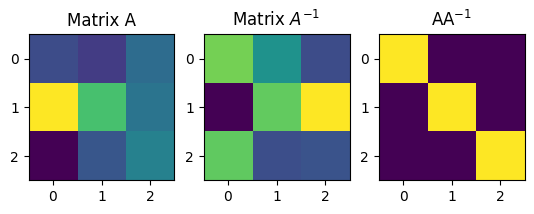

In [22]:
# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(idm)
plt.title('AA$^{-1}$')

plt.show()

In [23]:
# Code Challenge: Implement the MCA algorithm

m = 4
A = np.random.randn(m, m)

## Minor matrix
minors = np.zeros((m, m))
H = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        # select rows and columns
        rows = [True] * m
        rows[i] = False  # exclude the current row

        cols = [True] * m
        cols[j] = False  # exclude the current col

        # compute minors matrix
        minors[i, j] = np.linalg.det(A[rows, :][:, cols])

        # compute H matrix
        H[i, j] = (-1)**(i+j)

# cofactors matrix
C = H * minors

# Adjugate matrix
Ainv_MCA = C.T / np.linalg.det(A)
Ainv = np.linalg.inv(A)
print(Ainv_MCA, '\n\n', Ainv, '\n\n', Ainv_MCA-Ainv)

[[-0.21395856 -0.14045852  0.248312    0.27112192]
 [ 3.43003707  0.3038088  -0.16227917  0.01080025]
 [ 1.52497438  0.93988573  0.14976666  0.64703829]
 [-0.22001786  0.46334236  0.63878281  0.15459909]] 

 [[-0.21395856 -0.14045852  0.248312    0.27112192]
 [ 3.43003707  0.3038088  -0.16227917  0.01080025]
 [ 1.52497438  0.93988573  0.14976666  0.64703829]
 [-0.22001786  0.46334236  0.63878281  0.15459909]] 

 [[ 1.11022302e-16  8.32667268e-17 -8.32667268e-17 -1.11022302e-16]
 [ 0.00000000e+00  2.22044605e-16  8.32667268e-17  2.25514052e-16]
 [ 0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  5.55111512e-17  0.00000000e+00  0.00000000e+00]]



---
# VIDEO: Computing the inverse via row reduction
---


In [28]:
# matrix size
m = 4

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)

# rref
Asol = Aaug.rref()
Asol = Asol[0]  # remove unnecessay 2nd data
Ainvrref = Asol[:,m:m*2]  # the 2nd part of the concatenated matrix
Ainv = A.inv()

Size of Aaug: (4, 8)


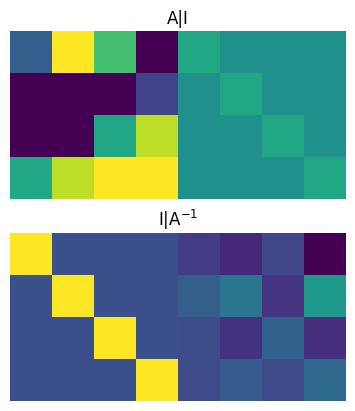

In [29]:
# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'),vmin=-5,vmax=5)
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()

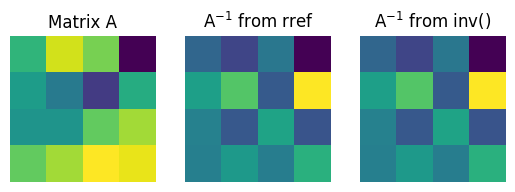

In [30]:
# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()

In [33]:
# Code Challenge: inverse of a diagonal matrix

A = np.array([[2,0], [0,3]])
# A = np.diag(np.arange(1, 6))
print(A, '\n')
print(np.linalg.inv(A))

[[2 0]
 [0 3]] 

[[0.5        0.        ]
 [0.         0.33333333]]



---
# VIDEO: Left inverse and right inverse
---


In [36]:
# m>n for left inverse,
# m<n for right inverse
m, n = 6, 3  # for the left inverse
# m, n = 3, 6  # for the right inverse

# create matrices
A = np.random.randn(m,n)  # wide matrix
AtA = A.T@A
AAt = A@A.T

# inspect ranks
print('Shape of A^TA:', np.shape(AtA) )
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) )
print('Shape of AA^T:', np.shape(AAt) )
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# left inverse
Aleft = np.linalg.inv(AtA)@A.T

# right inverse
Aright = A.T@np.linalg.inv(AAt)

# now test!
I_left  = Aleft  @ A
I_right = A @ Aright

print(I_left), print(' ')
print(I_right), print(' ')


# and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA   = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt   = AAt_inv @ AAt

print(I_AtA), print(' ')
print(I_AAt)

Shape of A^TA: (3, 3)
Rank of A^TA: 3
Shape of AA^T: (6, 6)
Rank of AA^T: 3
[[ 1.00000000e+00  1.45486375e-16  3.41509614e-17]
 [-3.28425340e-17  1.00000000e+00 -3.75434380e-17]
 [ 1.91341375e-16 -2.07101026e-16  1.00000000e+00]]
 
[[  0.87228465  -3.79853896  -1.6128403   -0.33196871  -1.53013468
  -11.7268978 ]
 [  0.17661867  -0.16866493  -1.25841606  -0.06768918  -2.05669301
   -1.20570022]
 [ -0.16940438   0.96029847   0.09498519  -0.07566646  -0.21727482
    3.12554149]
 [ -0.20966839   0.22342601   0.47371268   1.16324275   1.34394804
   -1.73310719]
 [ -0.21872448   0.69235321   0.65750323   0.24915947   0.98281635
    1.94303912]
 [ -0.44979521   1.81618925   0.7713868    0.48100516   0.90907128
    4.85161975]]
 
[[ 1.00000000e+00  6.07699434e-17  5.96931705e-17]
 [-1.07972477e-17  1.00000000e+00 -9.30706993e-18]
 [-5.69689367e-17 -1.41777391e-16  1.00000000e+00]]
 
[[ 1.71464638e+01  2.72173155e+00 -4.18045763e+00 -1.55398308e-01
  -3.51845303e+00 -7.95994506e+00]
 [-1.16620

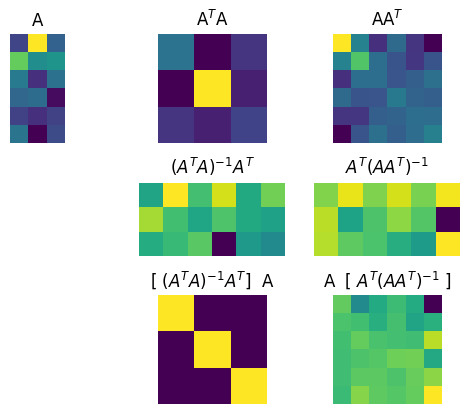

In [37]:
## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()


---
# VIDEO: The pseudoinverse, part 1
---


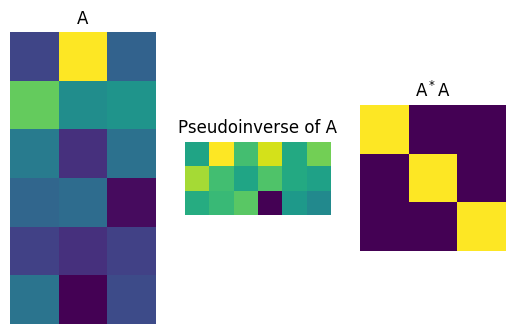

In [38]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

In [39]:
# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))

rank = 49


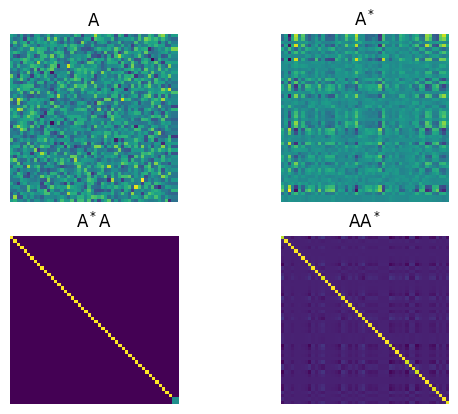

In [40]:
# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()

In [42]:
# Code Challenge: Pseudoinverse of invertible matrices

m = 5
A = np.random.randn(m, m)

AinvF = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)

print(np.round(AinvF, 3), '\n')
print(np.round(AinvP, 3), '\n')

print(np.round(AinvP-AinvF, 5))
# print(AinvP-AinvF)

[[ 0.431  0.16   0.493  0.619 -0.207]
 [-0.669  0.211 -0.789 -0.813  0.95 ]
 [ 1.408 -0.99   0.609  1.006 -1.107]
 [ 0.262  0.159  0.237 -0.18  -0.162]
 [-1.132  0.431 -0.197 -0.474  1.603]] 

[[ 0.431  0.16   0.493  0.619 -0.207]
 [-0.669  0.211 -0.789 -0.813  0.95 ]
 [ 1.408 -0.99   0.609  1.006 -1.107]
 [ 0.262  0.159  0.237 -0.18  -0.162]
 [-1.132  0.431 -0.197 -0.474  1.603]] 

[[ 0. -0. -0. -0. -0.]
 [-0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -0. -0. -0. -0.]
 [-0.  0.  0.  0.  0.]]
[[ 8.88178420e-16 -6.93889390e-16 -8.88178420e-16 -4.44089210e-16
  -1.49880108e-15]
 [-1.44328993e-15  1.55431223e-15  1.22124533e-15  6.66133815e-16
   1.88737914e-15]
 [ 8.88178420e-16  9.99200722e-16  4.66293670e-15  4.88498131e-15
   6.66133815e-16]
 [ 3.33066907e-16 -4.16333634e-16 -1.77635684e-15 -1.58206781e-15
  -2.16493490e-15]
 [-1.33226763e-15  1.88737914e-15  1.80411242e-15  8.88178420e-16
   2.44249065e-15]]
